# Estimation of pure component properties: Part 2. Estimation of critical property data by group contribution

In [1]:
import numpy as np
import pandas as pd
import pyther as pt

In [2]:
CONSTANTES_PARAMETROS_CRITICOS = pd.read_csv("tablas_gfs/constantes_ecuaciones_criticas.csv", sep=" ")
CONSTANTES_PARAMETROS_CRITICOS

,constantes,Tc,Pc,Vc
0,a,0.9889,0.00939,-0.2266
1,b,0.6990,-0.14041,86.1539
2,c,0.8607,0.00000,0.0000


In [3]:
CONSTANTES_PARAMETROS_CRITICOS["Tc"]

0    0.9889
1    0.6990
2    0.8607
Name: Tc, dtype: float64

In [4]:
CONSTANTES_PARAMETROS_CRITICOS.iloc[0]

constantes          a
Tc             0.9889
Pc            0.00939
Vc            -0.2266
Name: 0, dtype: object

In [5]:
CONSTANTES_PARAMETROS_EBULLICION = pd.read_csv("tablas_gfs/constantes_ecuaciones_ebullicion.csv", sep=" ")
CONSTANTES_PARAMETROS_EBULLICION

,constantes,Tb
0,a,0.6583
1,b,1.6868
2,c,84.3395


In [6]:
a, b, c = CONSTANTES_PARAMETROS_EBULLICION["Tb"]
print(a, b, c)


0.6583 1.6868 84.3395


In [7]:
GRUPOS_FUNCIONALES_EBULLICION = pd.read_csv("tablas_gfs/punto_ebullicion_gfs.csv", sep=" ", index_col="GroupNumber")
GRUPOS_FUNCIONALES_EBULLICION

,GroupContribution(K),MeanAbsoluteError(%),MeanAbsoluteError(K),StandardDeviation(K),NumberofComponents
GroupNumber,,,,,
1,177.3066,1.36,5.86,7.89,1841.0
2,251.8338,1.63,6.97,9.36,267.0
3,157.9527,1.24,5.89,7.74,168.0
4,239.4531,1.20,5.40,7.12,1153.0
5,240.6785,1.15,5.29,7.04,391.0
6,249.5809,1.79,7.63,10.76,98.0
7,266.8769,1.66,7.01,9.30,1024.0
8,201.0115,1.06,5.55,7.03,183.0
9,239.4957,1.59,6.68,8.92,330.0


In [8]:
#.ix is deprecated. Please use
#.loc for label based indexing or
#.iloc for positional indexing

GRUPOS_FUNCIONALES_EBULLICION.loc[1]["GroupContribution(K)"]

177.3066

In [9]:
f1 = 6
f2 = 2
f3 = 2

gf1 = GRUPOS_FUNCIONALES_EBULLICION.loc[1]["GroupContribution(K)"] * f1
gf2 = GRUPOS_FUNCIONALES_EBULLICION.loc[4]["GroupContribution(K)"] * f2
gf3 = GRUPOS_FUNCIONALES_EBULLICION.loc[6]["GroupContribution(K)"] * f3

print(gf1, gf2, gf3)

1063.8396 478.9062 499.1618


In [10]:
id_grupos = np.array([1,4,6])
id_grupos

array([1, 4, 6])

In [11]:
frecuencia_grupos =  np.array([6,2,2])
frecuencia_grupos

array([6, 2, 2])

In [12]:
numero_grupos = np.sum(frecuencia_grupos)
numero_grupos

10

In [13]:
contribucion_grupal_primaria = np.array([GRUPOS_FUNCIONALES_EBULLICION.loc[x]["GroupContribution(K)"] * y for x,y in zip(id_grupos,frecuencia_grupos)])
contribucion_grupal_primaria

array([ 1063.8396,   478.9062,   499.1618])

In [14]:
GRUPOS_FUNCIONALES_EBULLICION_SECUNDARIOS = pd.read_csv("tablas_gfs/punto_ebullicion_segundo_gfs.csv", sep=" ", index_col="GroupNumber")
GRUPOS_FUNCIONALES_EBULLICION_SECUNDARIOS

,GroupContribution(K),MeanAbsoluteError(%),MeanAbsoluteError(K),StandardDeviation(K),NumberofComponents
GroupNumber,,,,,
118,40.4205,1.20,6.04,8.22,135
119,-82.2328,2.96,12.38,13.88,19
120,-247.8893,0.16,0.43,0.43,2
121,-20.3996,2.35,8.33,10.70,139
122,15.4720,2.25,8.41,10.87,69
123,-172.4201,2.00,6.85,9.07,99
124,-99.8035,2.03,6.77,9.49,37
125,-62.3740,1.84,6.54,8.92,52
126,-40.0058,1.52,6.42,8.61,180


In [15]:
frecuencia_grupos_secundarios = np.array([1])
frecuencia_grupos_secundarios

array([1])

In [16]:
id_grupos_secundarios = np.array([133])
id_grupos_secundarios

array([133])

In [17]:
contribucion_grupal_secundaria = np.array([GRUPOS_FUNCIONALES_EBULLICION_SECUNDARIOS.loc[x]["GroupContribution(K)"] * y for x,y in zip(id_grupos_secundarios,frecuencia_grupos_secundarios)])
contribucion_grupal_secundaria

array([ 111.8372])

In [18]:
#contribucion_grupal_secundaria = GRUPOS_FUNCIONALES_EBULLICION_SECUNDARIOS.loc[133]["GroupContribution(K)"] * 1
#contribucion_grupal_secundaria


In [19]:
contribucion_grupal_total = np.sum(contribucion_grupal_primaria) + np.sum(contribucion_grupal_secundaria)
contribucion_grupal_total

2153.7448000000004

In [20]:
print(a, b, c)


0.6583 1.6868 84.3395


In [21]:
Tb = contribucion_grupal_total / (numero_grupos ** a + b) + c
Tb

429.50061053039957

$$ T_b = \frac{\sum_{i}^{m}{N_iC_i}}{n^a + b} + c $$

$$ GI = \frac{1}{n} \sum_{i}^m{\sum_{j}^n { \frac{C_{i-j}} {m-1} } } $$
donde $$C_{i-j} = C_{j-i} $$

In [22]:
GRUPOS_FUNCIONALES_EBULLICION_INTERACCIONES = pd.read_csv("tablas_gfs/punto_ebullicion_interacciones_gfs.csv", sep=" ", index_col="GroupNumber")
#GRUPOS_FUNCIONALES_EBULLICION_INTERACCIONES[["GroupContribution(K)", "MeanAbsoluteError(%)", "MeanAbsoluteError(K)", "StandardDeviation(K)", "NumberofComponents"]] = GRUPOS_FUNCIONALES_EBULLICION_INTERACCIONES[["GroupContribution(K)", "MeanAbsoluteError(%)", "MeanAbsoluteError(K)", "StandardDeviation(K)", "NumberofComponents"]].astype(float)
GRUPOS_FUNCIONALES_EBULLICION_INTERACCIONES

,InteractingGroups,GroupContribution(K),MeanAbsoluteError(%),MeanAbsoluteError(K),StandardDeviation(K),NumberofComponents
GroupNumber,,,,,,
135,A-A,291.7985,1.89,9.76,12.57,37.0
136,A-M,314.6126,1.24,5.73,7.42,8.0
137,A-N,286.9698,1.20,6.06,6.77,6.0
138,A-L,38.6974,0.00,0.00,0.00,1.0
139,A-C,146.7286,0.96,4.63,4.64,2.0
140,A-D,135.3991,1.79,8.59,10.30,52.0
141,A-E,226.4980,0.00,0.00,0.00,1.0
142,A-F,211.6814,2.49,11.46,13.19,18.0
143,A-G,46.3754,1.67,7.82,8.66,8.0


In [23]:
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

lista_Columnas = ["GroupContribution(K)", "MeanAbsoluteError(%)", "MeanAbsoluteError(K)", "StandardDeviation(K)", "NumberofComponents"]
coerce_df_columns_to_numeric(GRUPOS_FUNCIONALES_EBULLICION_INTERACCIONES, lista_Columnas)

In [24]:
Ni = np.ones(3)
Ci = np.ones(3)
n = 2
M = 45
GI = 9

#def temperatura_Ebullicion_funcional(CONSTANTES_PARAMETROS_EBULLICION, Ni, Ci, n):
def temperatura_Ebullicion_funcional(CONSTANTES_PARAMETROS_EBULLICION, contribucion_grupal_total, numero_grupos):

    a, b, c = CONSTANTES_PARAMETROS_EBULLICION["Tb"]
    #Tb = np.sum(Ni * Ci) / (n ** a + b) + c
    Tb = contribucion_grupal_total / (numero_grupos ** a + b) + c   
    
    return Tb

Tb = temperatura_Ebullicion_funcional(CONSTANTES_PARAMETROS_EBULLICION, contribucion_grupal_total, numero_grupos)
Tb

429.50061053039957

In [25]:
291.799 * (1/9)

32.42211111111111

In [26]:
286.970 * (2/9)

63.77111111111111

In [27]:
numero_grupos2 = 9
numero_interacciones = np.array([1,2])

frecuencia_grupos_interaccion = numero_interacciones / numero_grupos2
#np.array([1/numero_atoms,2/numero_atoms])
frecuencia_grupos_interaccion

array([ 0.11111111,  0.22222222])

In [28]:
id_grupos_interacciones = np.array([135,137])
id_grupos_interacciones

array([135, 137])

In [29]:
contribucion_grupal_interaccion = np.array([GRUPOS_FUNCIONALES_EBULLICION_INTERACCIONES.loc[x]["GroupContribution(K)"] * y for x,y in zip(id_grupos_interacciones,frecuencia_grupos_interaccion)])
contribucion_grupal_interaccion

array([ 32.42205556,  63.77106667])

In [30]:
contribucion_grupal_interaccion * 2

array([  64.84411111,  127.54213333])

In [31]:
#contribucion_grupal_total, numero_grupos, Tb = 0.2779983, 10, 245.9

def temperatura_critica_funcional(CONSTANTES_PARAMETROS_CRITICOS, contribucion_grupal_total, numero_grupos, Tb):
    
    a1, b1, c1 = CONSTANTES_PARAMETROS_CRITICOS["Tc"]
        
    # Temperatura crítica
    #Tc = Tb * (b1 + 1 / (a1 + (np.sum(Ni * Ci) + GI) ** c1))
    Tc = Tb * (b1 + 1 / (a1 + (contribucion_grupal_total) ** c1))
    
    return Tc

Tc = temperatura_critica_funcional(CONSTANTES_PARAMETROS_CRITICOS, contribucion_grupal_total, numero_grupos, Tb)
print("Tc = {} K".format(Tc))

Tc = 300.8010270068788 K


In [32]:
# perflouro-2-propanone, number of atoms: 10

id_grupos = np.array([7,21,51])
frecuencia_grupos =  np.array([2,6,1])
numero_grupos = 10

contribucion_grupal_primaria = np.array([GRUPOS_FUNCIONALES_EBULLICION.loc[x]["GroupContribution(K)"] * y for x,y in zip(id_grupos,frecuencia_grupos)])
print("contribucion_grupal_primaria = ", contribucion_grupal_primaria)

id_grupos_secundarios = np.array([120,121,123])
frecuencia_grupos_secundarios = np.array([1,2,1])

contribucion_grupal_secundaria = np.array([GRUPOS_FUNCIONALES_EBULLICION_SECUNDARIOS.loc[x]["GroupContribution(K)"] * y for x,y in zip(id_grupos_secundarios,frecuencia_grupos_secundarios)])
print("contribucion_grupal_secundaria = ", contribucion_grupal_secundaria)

contribucion_grupal_total = np.sum(contribucion_grupal_primaria) + np.sum(contribucion_grupal_secundaria)
print("contribucion_grupal_total = ", contribucion_grupal_total)

Tb = temperatura_Ebullicion_funcional(CONSTANTES_PARAMETROS_EBULLICION, contribucion_grupal_total, numero_grupos)
print("Tb = {} K".format(Tb))

numero_interacciones = np.array([1,2])

id_grupos_interacciones = np.array([135,137])
frecuencia_grupos_interaccion = numero_interacciones / numero_grupos
#print(frecuencia_grupos_interaccion)

contribucion_grupal_interaccion = np.array([GRUPOS_FUNCIONALES_EBULLICION_INTERACCIONES.loc[x]["GroupContribution(K)"] * y for x,y in zip(id_grupos_interacciones,frecuencia_grupos_interaccion)])
contribucion_grupal_interaccion

#contribucion_grupal_total, numero_grupos, Tb = 0.2779983, 10, 245.9

contribucion_grupal_total = 0.2779983

Tc = temperatura_critica_funcional(CONSTANTES_PARAMETROS_CRITICOS, contribucion_grupal_total, numero_grupos, Tb)
print("Tc = {} K".format(Tc))

contribucion_grupal_primaria =  [ 533.7538  319.1226  618.9782]
contribucion_grupal_secundaria =  [-247.8893  -40.7992 -172.4201]
contribucion_grupal_total =  1010.746
Tb = 246.32257795062776 K
Tc = 358.6226780080833 K


In [33]:
from rdkit import Chem
from rdkit.Chem import Draw
from pubchempy import get_cids, get_compounds
import matplotlib.pyplot as plt
%matplotlib inline

from rdkit.Chem.Draw import IPythonConsole

In [34]:
#datosAll.csv

datos = pd.read_csv("datosAll.csv", index_col="name")
datos

,ac,b,rm,del1
name,,,,
METHANE,2.528951,0.027157,0.392340,2.414214
ETHANE,6.128134,0.041073,0.525423,2.414214
PROPANE,10.312189,0.057060,0.603265,2.414214
n-BUTANE,15.248188,0.073399,0.672582,2.414214
n-PENTANE,20.967239,0.091349,0.745445,2.414214
n-HEXANE,27.280355,0.109979,0.814819,2.414214
n-HEPTANE,34.109839,0.129214,0.880689,2.414214
n-OCTANE,41.600631,0.149692,0.947826,2.414214
n-NONANE,49.446035,0.170173,1.005541,2.414214


In [35]:
properties_data = pt.Data_parse()

name = properties_data.read_dppr()
name


,Omega,Tc,Pc,Vc,Zc,Tm,Tb,Ttr,Ptr,Vliq,SolPar
Name,,,,,,,,,,,
METHANE,0.0115,190.564,45.389,0.0986,0.2860,90.694,111.660,90.694,1.154310e-01,0.037969,11.6000
ETHANE,0.0995,305.320,48.083,0.1455,0.2790,90.352,184.550,90.352,1.115220e-05,0.055229,12.4000
PROPANE,0.1523,369.830,41.924,0.2000,0.2760,85.470,231.110,85.470,1.662970e-09,0.075700,13.1000
n-BUTANE,0.2002,425.120,37.464,0.2550,0.2740,134.860,272.650,134.860,6.647720e-06,0.096483,13.7000
n-PENTANE,0.2515,469.700,33.259,0.3130,0.2700,143.420,309.220,143.420,6.774420e-07,0.116045,14.4000
n-HEXANE,0.3013,507.600,29.854,0.3710,0.2660,177.830,341.880,177.830,8.899040e-06,0.131362,14.9000
n-HEPTANE,0.3495,540.200,27.042,0.4280,0.2610,182.570,371.580,182.570,1.803050e-06,0.147024,15.2000
n-OCTANE,0.3996,568.700,24.574,0.4860,0.2560,216.380,398.830,216.380,2.080730e-05,0.163374,15.4000
n-NONANE,0.4435,594.600,22.601,0.5440,0.2520,219.660,423.970,219.660,4.249520e-06,0.179559,15.6000


In [36]:
name.loc["NITROGEN TRIFLUORIDE"]

Omega       0.125500
Tc        233.850000
Pc         44.707000
Vc          0.118700
Zc          0.277000
Tm         66.360000
Tb        144.090000
Ttr        66.360000
Ptr         0.000003
Vliq        0.235000
SolPar     14.996000
Name: NITROGEN TRIFLUORIDE, dtype: float64

In [37]:
parametrosCompletosPR = pd.read_excel("tabla_parametros_completa_PR.xlsx")
parametrosCompletosPR

,Omega,Tc,Pc,Vc,Zc,Tm,Tb,Ttr,Ptr,Vliq,SolPar,ac,b,rm,del1
METHANE,0.0115,190.564,45.389,0.0986,0.2860,90.694,111.660,90.694,1.154310e-01,0.037969,11.6000,2.528951,0.027157,0.392340,2.414214
ETHANE,0.0995,305.320,48.083,0.1455,0.2790,90.352,184.550,90.352,1.115220e-05,0.055229,12.4000,6.128134,0.041073,0.525423,2.414214
PROPANE,0.1523,369.830,41.924,0.2000,0.2760,85.470,231.110,85.470,1.662970e-09,0.075700,13.1000,10.312189,0.057060,0.603265,2.414214
n-BUTANE,0.2002,425.120,37.464,0.2550,0.2740,134.860,272.650,134.860,6.647720e-06,0.096483,13.7000,15.248188,0.073399,0.672582,2.414214
n-PENTANE,0.2515,469.700,33.259,0.3130,0.2700,143.420,309.220,143.420,6.774420e-07,0.116045,14.4000,20.967239,0.091349,0.745445,2.414214
n-HEXANE,0.3013,507.600,29.854,0.3710,0.2660,177.830,341.880,177.830,8.899040e-06,0.131362,14.9000,27.280355,0.109979,0.814819,2.414214
n-HEPTANE,0.3495,540.200,27.042,0.4280,0.2610,182.570,371.580,182.570,1.803050e-06,0.147024,15.2000,34.109839,0.129214,0.880689,2.414214
n-OCTANE,0.3996,568.700,24.574,0.4860,0.2560,216.380,398.830,216.380,2.080730e-05,0.163374,15.4000,41.600631,0.149692,0.947826,2.414214
n-NONANE,0.4435,594.600,22.601,0.5440,0.2520,219.660,423.970,219.660,4.249520e-06,0.179559,15.6000,49.446035,0.170173,1.005541,2.414214
n-DECANE,0.4923,617.700,20.824,0.6000,0.2470,243.510,447.305,243.510,1.374750e-05,0.195827,15.7000,57.916241,0.191869,1.068477,2.414214


In [38]:
# No es necesaria porque ya se guardo la tabla: tabla_parametros_completa_PR.csv
# parametrosCompletosPR.to_csv("tabla_parametros_completa_PR.csv", encoding='utf-8', index=True)

In [39]:
parametrosCompletosPRcsv = pd.read_csv("tabla_parametros_completa_PR.csv", index_col="name")
parametrosCompletosPRcsv

,Omega,Tc,Pc,Vc,Zc,Tm,Tb,Ttr,Ptr,Vliq,SolPar,ac,b,rm,del1
name,,,,,,,,,,,,,,,
METHANE,0.0115,190.564,45.389,0.0986,0.2860,90.694,111.660,90.694,1.154310e-01,0.037969,11.6000,2.528951,0.027157,0.392340,2.414214
ETHANE,0.0995,305.320,48.083,0.1455,0.2790,90.352,184.550,90.352,1.115220e-05,0.055229,12.4000,6.128134,0.041073,0.525423,2.414214
PROPANE,0.1523,369.830,41.924,0.2000,0.2760,85.470,231.110,85.470,1.662970e-09,0.075700,13.1000,10.312189,0.057060,0.603265,2.414214
n-BUTANE,0.2002,425.120,37.464,0.2550,0.2740,134.860,272.650,134.860,6.647720e-06,0.096483,13.7000,15.248188,0.073399,0.672582,2.414214
n-PENTANE,0.2515,469.700,33.259,0.3130,0.2700,143.420,309.220,143.420,6.774420e-07,0.116045,14.4000,20.967239,0.091349,0.745445,2.414214
n-HEXANE,0.3013,507.600,29.854,0.3710,0.2660,177.830,341.880,177.830,8.899040e-06,0.131362,14.9000,27.280355,0.109979,0.814819,2.414214
n-HEPTANE,0.3495,540.200,27.042,0.4280,0.2610,182.570,371.580,182.570,1.803050e-06,0.147024,15.2000,34.109839,0.129214,0.880689,2.414214
n-OCTANE,0.3996,568.700,24.574,0.4860,0.2560,216.380,398.830,216.380,2.080730e-05,0.163374,15.4000,41.600631,0.149692,0.947826,2.414214
n-NONANE,0.4435,594.600,22.601,0.5440,0.2520,219.660,423.970,219.660,4.249520e-06,0.179559,15.6000,49.446035,0.170173,1.005541,2.414214


In [40]:
parametrosCompletosPRcsv.loc["NITROGEN TRIFLUORIDE"]


Omega       0.125500
Tc        233.850000
Pc         44.707000
Vc          0.118700
Zc          0.277000
Tm         66.360000
Tb        144.090000
Ttr        66.360000
Ptr         0.000003
Vliq        0.235000
SolPar     14.996000
ac          3.866416
b           0.033834
rm          0.563942
del1        2.414214
Name: NITROGEN TRIFLUORIDE, dtype: float64

In [41]:
parametrosCompletosPRcsv.loc["1,1,2,2-TETRAPHENYLETHANE"]
#parametrosCompletosPRcsv.loc["3,3,4,4-TETRAPHENYLETHANE"]


Omega       0.732200
Tc        827.000000
Pc         16.482000
Vc          1.022000
Zc          0.248000
Tm        485.150000
Tb        633.150000
Ttr       485.150000
Ptr         0.016503
Vliq        0.345628
SolPar     14.428800
ac        131.162724
b           0.324555
rm          1.359174
del1        2.414214
Name: 1,1,2,2-TETRAPHENYLETHANE, dtype: float64

In [42]:
name_componets = list(parametrosCompletosPRcsv.index)
name_componets

['METHANE',
 'ETHANE',
 'PROPANE',
 'n-BUTANE',
 'n-PENTANE',
 'n-HEXANE',
 'n-HEPTANE',
 'n-OCTANE',
 'n-NONANE',
 'n-DECANE',
 'n-UNDECANE',
 'n-DODECANE',
 'n-TRIDECANE',
 'n-TETRADECANE',
 'n-PENTADECANE',
 'n-HEXADECANE',
 'n-HEPTADECANE',
 'n-OCTADECANE',
 'n-NONADECANE',
 'n-EICOSANE',
 'n-HENEICOSANE',
 'n-DOCOSANE',
 'n-TRICOSANE',
 'n-TETRACOSANE',
 'n-PENTACOSANE',
 'n-HEXACOSANE',
 'n-OCTACOSANE',
 'n-TRIACONTANE',
 'n-DOTRIACONTANE',
 'n-HEXATRIACONTANE',
 'ISOBUTANE',
 'ISOPENTANE',
 '2-METHYLPENTANE',
 '3-METHYLPENTANE',
 '2-METHYLHEXANE',
 '3-METHYLHEXANE',
 '2-METHYLHEPTANE',
 '3-METHYLHEPTANE',
 '4-METHYLHEPTANE',
 '2-METHYLOCTANE',
 '3-METHYLOCTANE',
 '4-METHYLOCTANE',
 '2-METHYLNONANE',
 '3-METHYLNONANE',
 '4-METHYLNONANE',
 '5-METHYLNONANE',
 'NEOPENTANE',
 '2,2-DIMETHYLBUTANE',
 '2,3-DIMETHYLBUTANE',
 '2,2-DIMETHYLPENTANE',
 '2,3-DIMETHYLPENTANE',
 '2,4-DIMETHYLPENTANE',
 '3,3-DIMETHYLPENTANE',
 '2,2-DIMETHYLHEXANE',
 '2,3-DIMETHYLHEXANE',
 '2,4-DIMETHYLHEXANE',
 

In [43]:
#moleculaSmiles = np.chararray(10)
#moleculaSmiles = []

def names_to_smiles(name_componet):
    
    ##for i, name in enumerate(name_componets):
        # query for cid first in order to avoid timeouterror
    ##    moleculaSmiles[i] = get_compounds(name, 'name')[0].canonical_smiles
    ##    print(moleculaSmiles)
        #cid = get_cids(compound, 'name')[0]
        #smiles = get_compounds(cid)[0].canonical_smiles
    cid = get_cids(name_componet, 'name')[0]
    moleculaSmiles = get_compounds(cid)[0].canonical_smiles
        
    #moleculaSmiles = get_compounds(name, 'name')[0].canonical_smiles

    return moleculaSmiles

In [44]:
lista_sustancias = name_componets[40:43] #ensayo 2
lista_sustancias = name_componets[140:143] #ensayo 3
lista_sustancias = name_componets[340:345] #ensayo 4
#lista_sustancias = name_componets[330:342] #ensayo 5

#'perflouro-2-propanone'

lista_sustancias.append("perfluoro-2-propanone")
lista_sustancias.append("methyl m-toluate")
lista_sustancias

['1,1,2,2-TETRAPHENYLETHANE',
 'd-LIMONENE',
 'alpha-PHELLANDRENE',
 'beta-PHELLANDRENE',
 'alpha-TERPINENE',
 'perfluoro-2-propanone',
 'methyl m-toluate']

In [45]:
dppr_smiles = [names_to_smiles(name) for name in lista_sustancias]


In [46]:
dppr_smiles

['C1=CC=C(C=C1)C(C2=CC=CC=C2)C(C3=CC=CC=C3)C4=CC=CC=C4',
 'CC1=CCC(CC1)C(=C)C',
 'CC1=CCC(C=C1)C(C)C',
 'CC(C)C1CCC(=C)C=C1',
 'CC1=CC=C(CC1)C(C)C',
 'C(=O)(C(F)(F)F)C(F)(F)F',
 'CC1=CC=CC(=C1)C(=O)OC']

In [47]:
['1,1,2,2-TETRAPHENYLETHANE',
 'd-LIMONENE',
 'alpha-PHELLANDRENE',
 'beta-PHELLANDRENE',
 'alpha-TERPINENE',
 'perfluoro-2-propanone',
 'methyl m-toluate']

['C1=CC=C(C=C1)C(C2=CC=CC=C2)C(C3=CC=CC=C3)C4=CC=CC=C4',
 'CC1=CCC(CC1)C(=C)C',
 'CC1=CCC(C=C1)C(C)C',
 'CC(C)C1CCC(=C)C=C1',
 'CC1=CC=C(CC1)C(C)C',
 'C(=O)(C(F)(F)F)C(F)(F)F',
 'CC1=CC=CC(=C1)C(=O)OC']

['C1=CC=C(C=C1)C(C2=CC=CC=C2)C(C3=CC=CC=C3)C4=CC=CC=C4',
 'CC1=CCC(CC1)C(=C)C',
 'CC1=CCC(C=C1)C(C)C',
 'CC(C)C1CCC(=C)C=C1',
 'CC1=CC=C(CC1)C(C)C',
 'C(=O)(C(F)(F)F)C(F)(F)F',
 'CC1=CC=CC(=C1)C(=O)OC']

In [48]:
def graficarMolecula(smiles):
    
    molecula_D = Chem.MolFromSmiles(smiles)
    Draw.MolToMPL(molecula_D, size=(100, 100))
    
    return molecula_D

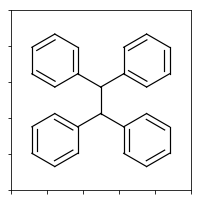

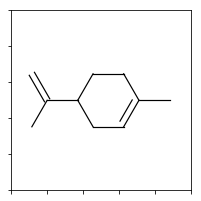

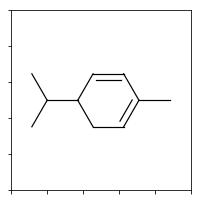

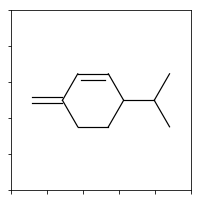

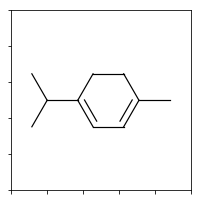

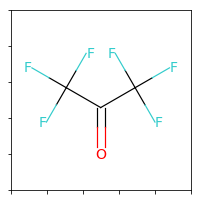

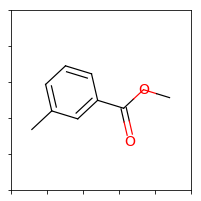

In [49]:
# ensayo 5

moleculasAgrupadas = [graficarMolecula(smiles) for smiles in dppr_smiles]

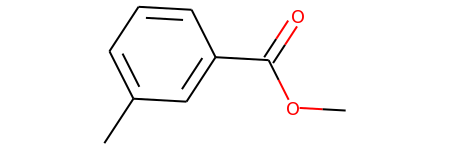

In [50]:
moleculasAgrupadas[-1]

In [51]:
molecula_D = [Chem.MolFromSmiles(smiles) for smiles in dppr_smiles]
molecula_D


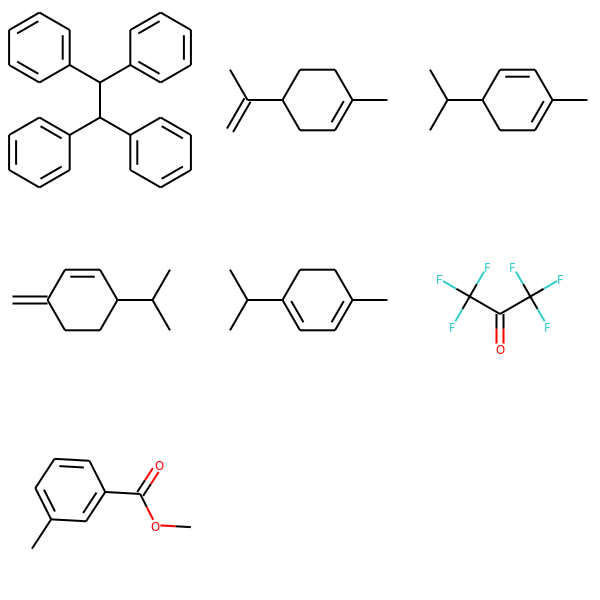

In [52]:
#ms = [Chem.MolFromSmiles(x) for x in smis]
#Draw.MolsToGridImage(ms)

Draw.MolsToGridImage(molecula_D)



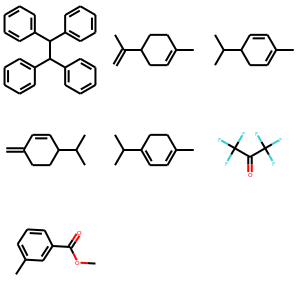

In [53]:
#img=Draw.MolsToGridImage(molecula_D[:4],molsPerRow=4,subImgSize=(300,300), legends=["molecula_1", "molecula_2", "molecula_3"])
img=Draw.MolsToGridImage(molecula_D,molsPerRow=3,subImgSize=(100,100))

img

C1=CC=C(C=C1)C(C2=CC=CC=C2)C(C3=CC=CC=C3)C4=CC=CC=C4


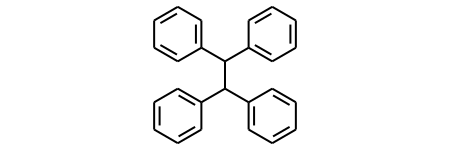

In [54]:
print(dppr_smiles[0])
molecula_A = Chem.MolFromSmiles(dppr_smiles[0])
molecula_A


In [55]:
molecula_A.GetAtomWithIdx(0).GetSymbol()

'C'

In [56]:
molecula_A.GetAtomWithIdx(14).GetSymbol()

'C'

In [57]:
# revisar el atributo _Name

#molecula_A.GetProp("_Name")


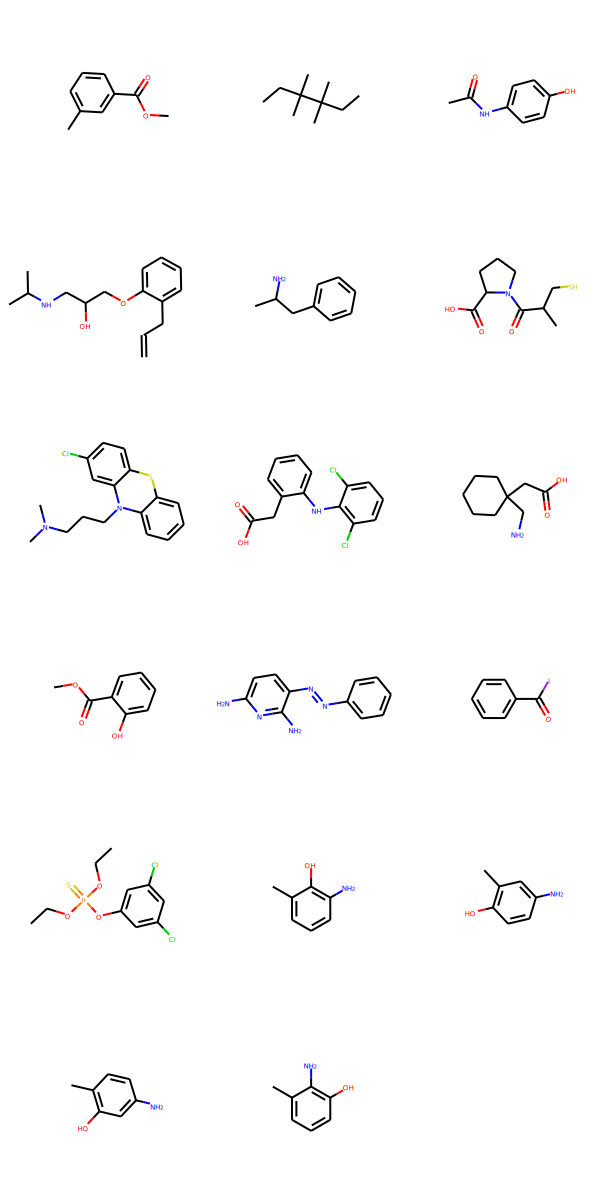

In [58]:
from rdkit import Chem
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
'CC1=CC=CC(=C1)C(=O)OC'
some_chemicals =[
                'CC1=CC=CC(=C1)C(=O)OC',
                'CCC(C)(C)C(C)(C)CC',
                'CC(=O)Nc1ccc(O)cc1',
                'CC(C)NCC(O)COc1ccccc1CC=C',
                'CC(N)Cc1ccccc1',
                'CC(CS)C(=O)N1CCCC1C(=O)O',
                'CN(C)CCCN1c2ccccc2Sc3ccc(Cl)cc13',
                'OC(=O)Cc1ccccc1Nc2c(Cl)cccc2Cl',
                'NCC1(CC(=O)O)CCCCC1',
                'COC(=O)c1ccccc1O',
                'Nc1ccc(N=Nc2ccccc2)c(N)n1',
                'IC(=O)c1ccccc1',
                'CCOP(=S)(OCC)Oc1cc(Cl)cc(Cl)c1',
                'c1c(C)c(O)c(N)cc1',
                'Oc1c(C)cc(N)cc1',
                'Oc1c(C)ccc(N)c1',
                'c1c(C)c(N)c(O)cc1',]

some_chemicals_MOL =[
                'CC(=O)Nc1ccc(O)cc1', 'molecula_1',
                'CC(C)NCC(O)COc1ccccc1CC=C', 'molecula_1',
                'CC(N)Cc1ccccc1', 'molecula_1',
                ]



some_chemicals = list(map(Chem.MolFromSmiles, some_chemicals))
SVG(Draw._MolsToGridSVG(some_chemicals))
#len(some_chemicals)

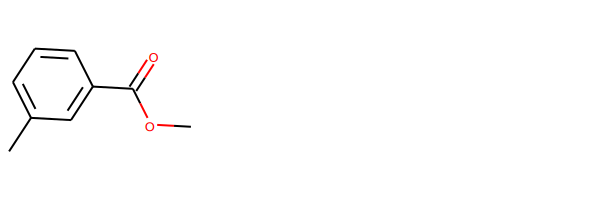

In [59]:
mol = some_chemicals[0]
SVG(Draw._MolsToGridSVG([mol]))

In [60]:
mal = Chem.MolFromSmiles('CC(C)CCO')
len(mal.GetSubstructMatches(Chem.MolFromSmarts('[CH3;X4]')))
#rta:2

2

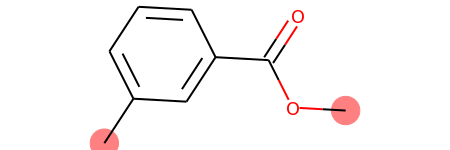

In [61]:
molecula_1 = some_chemicals[0]

len(molecula_1.GetSubstructMatches(Chem.MolFromSmarts('[CH3;X4]')))

molecula_1

In [62]:
names_to_smiles(['perflouro-2-propanone'])

IndexError: list index out of range

In [ ]:
'methyl m-toluate'

In [63]:
A =  {'methyl m-toluate' : 'CC1=CC=CC(=C1)C(=O)OC'}
A

{'methyl m-toluate': 'CC1=CC=CC(=C1)C(=O)OC'}

[]
Grupo primarios
((0,), (3,), (4,), (6,), (7,), (9,))
ensayoGrupo1 =  6
((1,), (8,))
ensayoGrupo4 =  2
((2,), (5,))
ensayoGrupo6 =  2
Grupos terciarios
((2, 5),)
ensayoGrupo133 =  1
((0,), (3,), (4,), (6,), (7,), (9,))
((1,), (8,))
((2,), (5,))
((2, 5),)
[ 6.  2.  2.  1.]


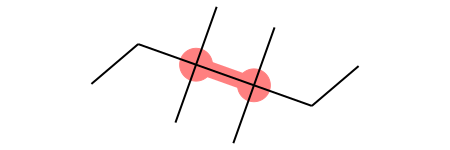

In [79]:
'CC(=O)Nc1ccc(O)cc1'
'perflouro-2-propanone'

#contadorGrupos = np.ones(10)

numSS = np.array([])
#numSS = np.zeros(2)
print(numSS)
def contarGrupos(molecula, grupo):
    ERT = some_chemicals[molecula].GetSubstructMatches(Chem.MolFromSmarts(grupo))
    print(ERT)
    
    numS = len(some_chemicals[molecula].GetSubstructMatches(Chem.MolFromSmarts(grupo), uniquify=True))
    #print(numS)
    #some_chemicals[0]
    
    return numS

#----------------
#grupo1 = 'C'
####grupo1 = '[CH3;X4]'
####grupo2 = 'C=O'
####grupo3 = 'N'
####grupo4 = 'c1ccccc1'
####grupo5 = '[OH]'
####grupo6 = '[CH2]'
#grupo7 = '[$([C][CH3;X4])]'
#grupo7 = '[$([CX2][CH3;X4])]'
#grupo7 = '[#6,C;$([CX2][CH3;X4])]'
#grupo7 = '[$([CX4]C[CH3;X4])]'
#grupo7 = '[CH2]'
# grupo7 = '[CH0][CH0]' # Este funciona para el ejemplo 1

####grupo7 = '[CH0CCC][CH0CCC]'
####grupo8 = '[CH0]'
#----------------



#grupo1 = 'C'
grupo1 = '[CH3;X4]'
grupo4 = '[CH2]'
grupo6 = '[CH0]'
grupo133 = '[CH0CCC][CH0CCC]'

grupos = [grupo1, grupo4, grupo6, grupo133]

#TotalGrupos = [contarGrupos(grupo) for grupo in grupos]

#np.insert(a, 1, 5)
molecula = 1 #3,3,4,4-tetramethylhexane
#molecula = 0 #methyl m-toluate

print("Grupo primarios")

ensayoGrupo1 = contarGrupos(molecula, grupo1)
print("ensayoGrupo1 = ", ensayoGrupo1)

ensayoGrupo4 = contarGrupos(molecula, grupo4)
print("ensayoGrupo4 = ", ensayoGrupo4)

ensayoGrupo6 = contarGrupos(molecula, grupo6)
print("ensayoGrupo6 = ", ensayoGrupo6)

print("Grupos terciarios")

ensayoGrupo133 = contarGrupos(molecula, grupo133)
print("ensayoGrupo133 = ", ensayoGrupo133)

TotalGrupos = np.append(numSS, [contarGrupos(molecula, grupo) for grupo in grupos]) 

#TotalGrupos = np.array([np.append(numSS, contarGrupos(grupo)) for grupo in grupos])
print(TotalGrupos)
some_chemicals[molecula]

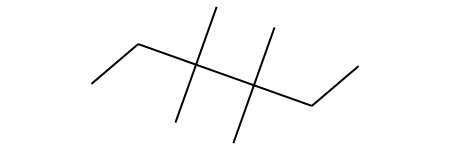

In [65]:


mol33 = Chem.MolFromSmiles('CCC(C)(C)C(C)(C)CC')
mol33

In [66]:
bis3 = mol33.GetSubstructMatches(Chem.MolFromSmarts('[CH0][CH0]'))
print(bis3)




((2, 5),)


In [67]:
bs2 = [mol33.GetBondBetweenAtoms(x,y).GetIdx() for x,y in bis3]
bs2



[4]

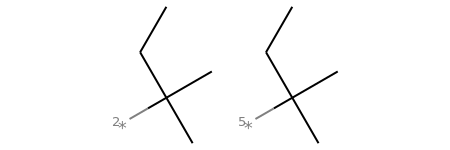

In [68]:
nm = Chem.FragmentOnBonds(mol33,bs2)
nm

In [69]:
len(some_chemicals)
some_chemicals

Grupo primarios
((0, 1),)
ensayoGrupo3 =  1
((2,), (3,), (4,), (6,))
ensayoGrupo15 =  4
Grupos terciarios
((7,),)
ensayoGrupo128 =  1
((10, 9),)
ensayoGrupo2 =  1
((10, 9),)
((0, 1),)
((2,), (3,), (4,), (6,))
((1,), (5,))
((5, 7, 8, 9, 10),)
((7,),)
((5, 7, 8),)
((7,),)
[ 1.  1.  4.  2.  1.  1.  1.  1.]


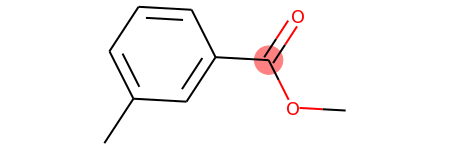

In [70]:

grupo1 = '[CH3;X4]'
grupo4 = '[CH2]'
grupo6 = '[CH0]'
grupo133 = '[CH0CCC][CH0CCC]'

grupo2 = '[CH3][O]'
grupo3 = '[CH3][c]'
grupo15 = '[ch]'
grupo16 = '[c;$([c](c)(c)[C])]'
grupo45 =  '[c]C(=O)O[C]'
grupo128 = '[CH0]'
grupo118 = '[c;$([c](c)(c)[C])][C]=[O]' #'[c][C]=[O]'

grupos = [grupo2, grupo3, grupo15, grupo16, grupo45, grupo128, grupo118, grupo128]

molecula = 0 #methyl m-toluate

print("Grupo primarios")
ensayoGrupo3 = contarGrupos(molecula, grupo3)
print("ensayoGrupo3 = ", ensayoGrupo3)

ensayoGrupo15 = contarGrupos(molecula, grupo15)
print("ensayoGrupo15 = ", ensayoGrupo15)

print("Grupos terciarios")
ensayoGrupo128 = contarGrupos(molecula, grupo128)
print("ensayoGrupo128 = ", ensayoGrupo128)

ensayoGrupo2 = contarGrupos(molecula, grupo2)
print("ensayoGrupo2 = ", ensayoGrupo2)

TotalGrupos = np.append(numSS, [contarGrupos(molecula, grupo) for grupo in grupos]) 
print(TotalGrupos)
some_chemicals[molecula]

In [80]:
counts = []
for m in some_chemicals[molecula]:
    rc = m.GetRingInfo().NumRings()
    nfrags = len(Chem.GetMolFrags(m))
    ec = m.GetNumBonds()-m.GetNumAtoms()+nfrags
    if ec!=rc:
        print (Chem.MolToSmiles(m),ec,rc)
    counts.append((ec,rc,m.GetProp('_Name')))

TypeError: 'Mol' object is not iterable

In [81]:
from rdkit.Chem import BRICS

m1 = some_chemicals[molecula]

#BRICS.BRICSDecompose(m1)
sorted(BRICS.BRICSDecompose(m1))
#['[14*]c1nc(N)nc2[nH]cnc12', '[3*]O[3*]', '[4*]CC(=O)C(C)C']

#m2 = cdk2mols[20]

['CCC(C)(C)C(C)(C)CC']

((0, 1), (4, 3), (6, 5), (7, 8))


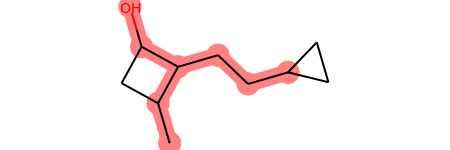

In [82]:
mol22 = Chem.MolFromSmiles('CC1CC(O)C1CCC1CC1')
bis = mol22.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]'))
print(bis)
mol22

In [83]:
bs = [mol22.GetBondBetweenAtoms(x,y).GetIdx() for x,y in bis]
bs

[0, 3, 5, 7]

((0, 1), (4, 3), (6, 5), (7, 8))


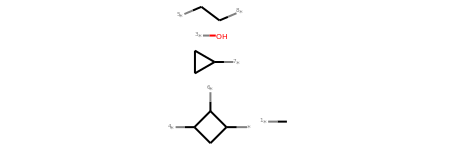

In [84]:
bis = mol22.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]'))
print(bis)
mol22

bs = [mol22.GetBondBetweenAtoms(x,y).GetIdx() for x,y in bis]
bs

nm = Chem.FragmentOnBonds(mol22,bs)
nm

((0, 1), (4, 3), (6, 5), (7, 8))


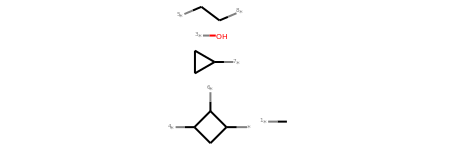

In [85]:
bis = mol22.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]'))
print(bis)
mol22

bs = [mol22.GetBondBetweenAtoms(x,y).GetIdx() for x,y in bis]
bs

nm = Chem.FragmentOnBonds(mol22,bs)
nm

In [86]:
contribucion = [177.307, 239.453, 249.581, 111.837]
grupoContribucion = {grupos[i] : contribucion[i] for i, _ in enumerate(grupos)}
grupoContribucion

{'[CH0CCC][CH0CCC]': 111.837,
 '[CH0]': 249.581,
 '[CH2]': 239.453,
 '[CH3;X4]': 177.307}

In [87]:



grupoOrdenados = {grupos[i] : TotalGrupos[i] for i, _ in enumerate(grupos)}
grupoOrdenados


{'[CH0CCC][CH0CCC]': 1.0, '[CH0]': 2.0, '[CH2]': 2.0, '[CH3;X4]': 6.0}

In [88]:
some_chemicals_SMILES =[
                'CC(=O)Nc1ccc(O)cc1',
                'CCC(C)(C)C(C)(C)CC',
                'CC(C)NCC(O)COc1ccccc1CC=C',
                'CC(N)Cc1ccccc1',
                'CC(CS)C(=O)N1CCCC1C(=O)O',
                'CN(C)CCCN1c2ccccc2Sc3ccc(Cl)cc13',
                'OC(=O)Cc1ccccc1Nc2c(Cl)cccc2Cl',
                'NCC1(CC(=O)O)CCCCC1',
                'COC(=O)c1ccccc1O',
                'Nc1ccc(N=Nc2ccccc2)c(N)n1',
                'IC(=O)c1ccccc1',
                'CCOP(=S)(OCC)Oc1cc(Cl)cc(Cl)c1',
                'c1c(C)c(O)c(N)cc1',
                'Oc1c(C)cc(N)cc1',
                'Oc1c(C)ccc(N)c1',
                'c1c(C)c(N)c(O)cc1',
                ]

In [89]:
CONTRIBUCION_MOLECULA =pd.DataFrame(data=[grupoOrdenados, grupoContribucion], index=[some_chemicals_SMILES[0], "3,3,4,4-tetramethylhexane"])
CONTRIBUCION_MOLECULA

,[CH0CCC][CH0CCC],[CH0],[CH2],[CH3;X4]
CC(=O)Nc1ccc(O)cc1,1.000,2.000,2.000,6.000
"3,3,4,4-tetramethylhexane",111.837,249.581,239.453,177.307


In [90]:
d = {'col1': [1], 'col2': [3]}
d

{'col1': [1], 'col2': [3]}

In [91]:
d = {'col1': [1], 'col2': [3]}
df = pd.DataFrame(data=d, index=['foo'])
df
#   col1  col2
#0     1     3
#1     2     4

,col1,col2
foo,1,3


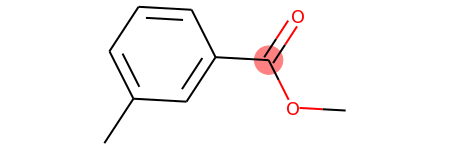

In [92]:
some_chemicals[0]

Grupo primarios
ensayoGrupo1 =  6
ensayoGrupo4 =  2
ensayoGrupo6 =  2
Grupos terciarios
ensayoGrupo133 =  1
[ 6.  2.  2.  1.]


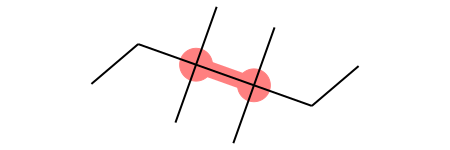

In [93]:

numSS = np.array([])

def contarGrupos(molecula, grupo):
   
    numS = len(some_chemicals[molecula].GetSubstructMatches(Chem.MolFromSmarts(grupo), uniquify=True))
    
    return numS

grupo1 = '[CH3;X4]'
grupo4 = '[CH2]'
grupo6 = '[CH0]'
grupo133 = '[CH0CCC][CH0CCC]'

grupos = [grupo1, grupo4, grupo6, grupo133]

molecula = 1

print("Grupo primarios")
ensayoGrupo1 = contarGrupos(molecula, grupo1)
print("ensayoGrupo1 = ", ensayoGrupo1)

ensayoGrupo4 = contarGrupos(molecula, grupo4)
print("ensayoGrupo4 = ", ensayoGrupo4)

ensayoGrupo6 = contarGrupos(molecula, grupo6)
print("ensayoGrupo6 = ", ensayoGrupo6)

print("Grupos terciarios")
ensayoGrupo133 = contarGrupos(molecula, grupo133)
print("ensayoGrupo133 = ", ensayoGrupo133)

TotalGrupos = np.append(numSS, [contarGrupos(molecula, grupo) for grupo in grupos]) 

print(TotalGrupos)
some_chemicals[molecula]

In [94]:
NOMBRES_SUSTANCIA = "3,3,4,4-tetramethylhexane"

sustancia = pd.DataFrame(data=[grupoOrdenados, grupoContribucion], index=[some_chemicals_SMILES[1],NOMBRES_SUSTANCIA])
print(sustancia)
CTGF = np.sum(sustancia.iloc[0] * sustancia.iloc[1])
print("Contribución grupal total = ", CTGF)
Tb = temperatura_Ebullicion_funcional(CONSTANTES_PARAMETROS_EBULLICION, CTGF, numero_grupos)
print("MCG=Metodo de Contribución de Grupos")
print("Temperatura de ebullición MCG = {} K".format(Tb))

                           [CH0CCC][CH0CCC]    [CH0]    [CH2]  [CH3;X4]
CCC(C)(C)C(C)(C)CC                    1.000    2.000    2.000     6.000
3,3,4,4-tetramethylhexane           111.837  249.581  239.453   177.307
Contribución grupal total =  2153.747
MCG=Metodo de Contribución de Grupos
Temperatura de ebullición MCG = 429.50096310441063 K


In [95]:
Tb = temperatura_Ebullicion_funcional(CONSTANTES_PARAMETROS_EBULLICION, CTGF, numero_grupos)
Tb

429.50096310441063

2


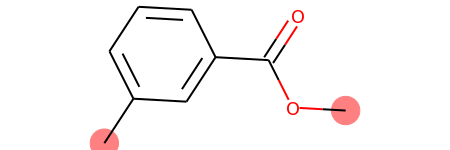

In [96]:
numS = len(some_chemicals[0].GetSubstructMatches(Chem.MolFromSmarts(grupo1)))
print(numS)
molecula1 = some_chemicals[0]
molecula1

,uno
CC(=O)Nc1ccc(O)cc1,"<img src="""" alt=""Mol""/>"

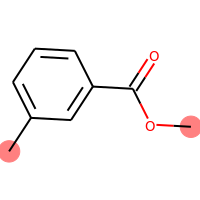

In [97]:
some_chemicals[0]

pd.DataFrame(data={"uno" : some_chemicals[0]}, index=[some_chemicals_SMILES[0]])

In [98]:
w = Chem.SDWriter('bz.out.sdf')
for mol in some_chemicals:
    # skip molecules the rdkit doesn't read:
    if not mol: continue
    # add coordinates so we get a correct mol block:
    AllChem.Compute2DCoords(mol)
    w.write(mol)

w.flush()

,ID,ROMol
0,,
1,,
2,,
3,,
4,,
5,,
6,,
7,,
8,,
9,,

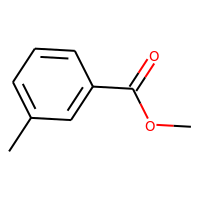
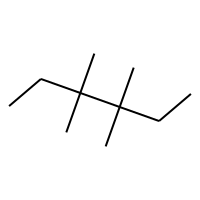
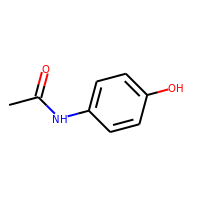
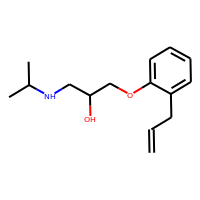
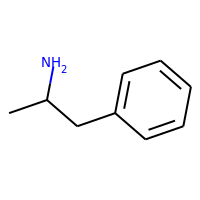
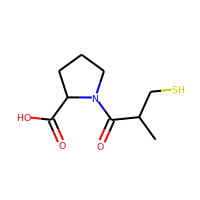
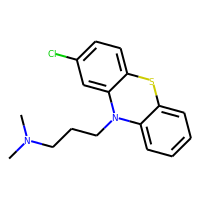
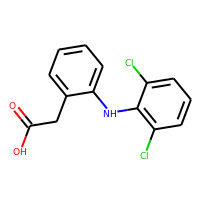
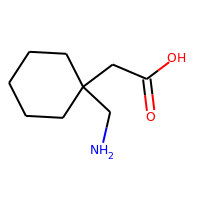
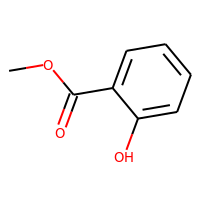
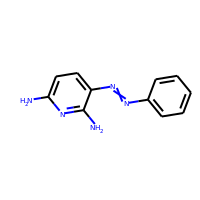
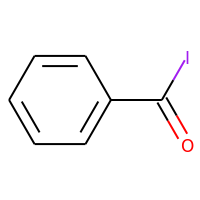
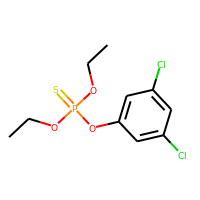
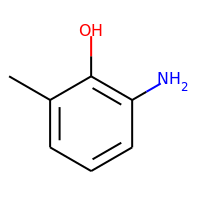
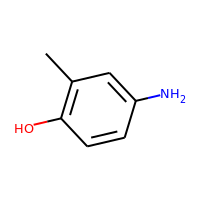
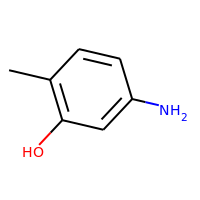
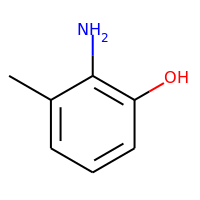

In [99]:
SDFFile = "bz.out.sdf"
BRDLigs = PandasTools.LoadSDF(SDFFile)
BRDLigs

In [100]:
BRDLigs['Tc']= [100.23,200.34,3,4,5,6,7,8,3,5,4,76,7,5,4,5]
#BRDLigs['Pc']= [40.23,200.34,3,4,5,6,7,8,3,5,4,76,7,5,4]
#BRDLigs['ac']= [4.2673,200.34,3,4,5,6,7,8,3,5,4,76,7,5,4]
#BRDLigs['b']= [40.23,200.34,3,4,5,6,7,8,3,5,4,76,7,5,4]

ValueError: Length of values does not match length of index

,ID,ROMol
0,,
1,,
2,,
3,,
4,,
5,,
6,,
7,,
8,,
9,,

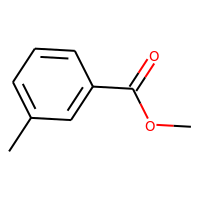
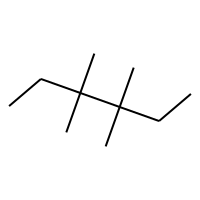
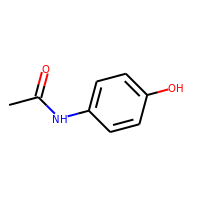
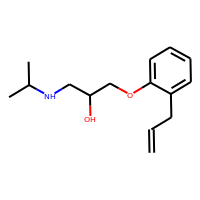
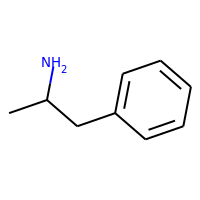
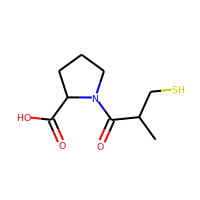
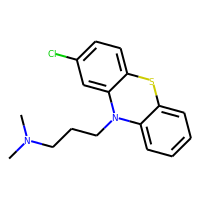
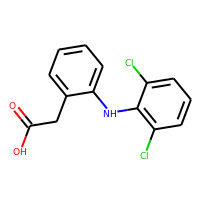
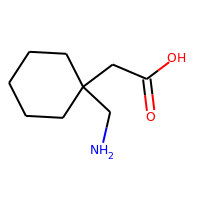
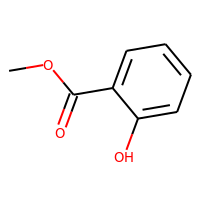
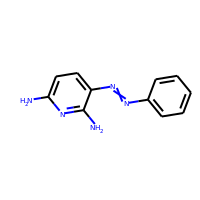
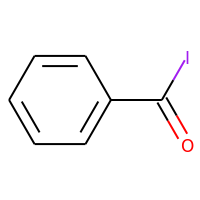
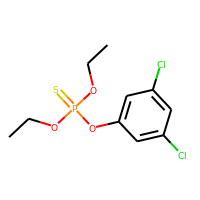
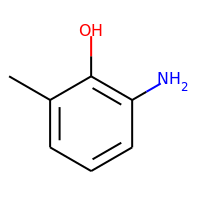
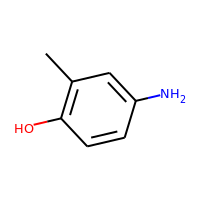
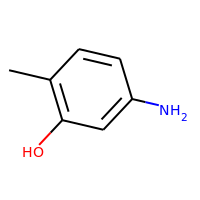
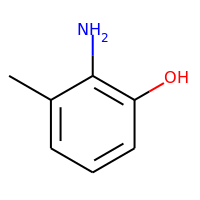

In [101]:
BRDLigs

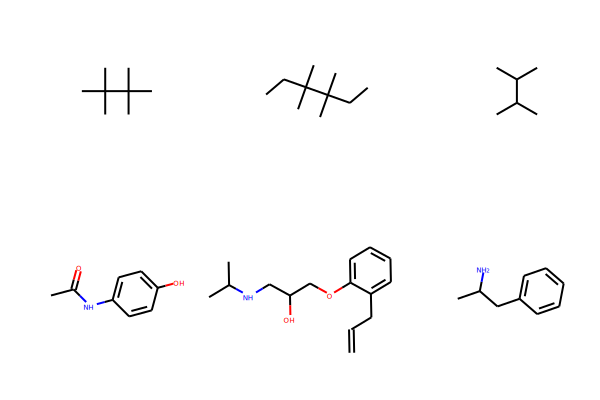

In [102]:
some_chemicals_MOL =[
                'CC(C)(C)C(C)(C)C',    
                'CCC(C)(C)C(C)(C)CC',
                'C(C)(C)C(C)(C)',
                'CC(=O)Nc1ccc(O)cc1',
                'CC(C)NCC(O)COc1ccccc1CC=C',
                'CC(N)Cc1ccccc1',
                ]

some_chemicals = list(map(Chem.MolFromSmiles, some_chemicals_MOL))
SVG(Draw._MolsToGridSVG(some_chemicals))

In [103]:
#import sdf

In [104]:
ns = 'CC(C)NCC(O)COc1ccccc1CC=C'

molecula_N = Chem.MolFromSmiles(ns)
molecula_N

Draw.MolsToGridImage(ns)

TypeError: No registered converter was able to extract a C++ pointer to type RDKit::ROMol from this Python object of type str

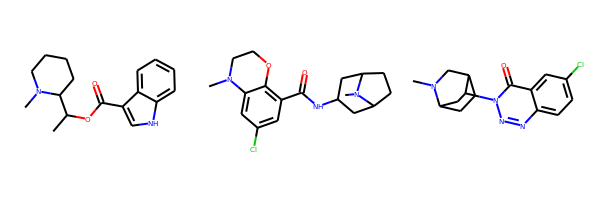

In [105]:
smis = ['CC(OC(=O)c1c[nH]c2ccccc12)C1CCCCN1C', 
        'CN1CCOc2c(C(=O)NC3CC4CCC(C3)N4C)cc(Cl)cc21',
        'CN1CC2CCC1CC2n1nnc2ccc(Cl)cc2c1=O']
ms = [Chem.MolFromSmiles(x) for x in smis]
Draw.MolsToGridImage(ms)



In [106]:
molecula_A.GetPropNames

#[x.GetProp("Name") for x in ms[:8]]

<bound method GetPropNames of <rdkit.Chem.rdchem.Mol object at 0x7fb3bfba4b20>>

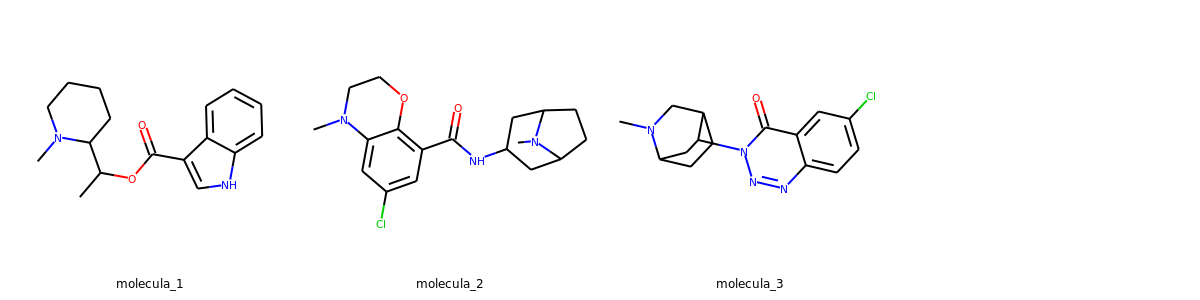

In [107]:
img=Draw.MolsToGridImage(ms[:4],molsPerRow=4,subImgSize=(300,300), legends=["molecula_1", "molecula_2", "molecula_3"])
img

# img.save('images/cdk2_molgrid.o.png')

In [108]:
molecula_A.GetAtoms()

In [109]:
ind_map = {}

for atom in molecula_A.GetAtoms():
    map_num = atom.GetAtomMapNum()
    if map_num:
        ind_map[map_num-1] = atom.GetIdx()
        
ind_map

{}

In [110]:
def propiedades_criticas_funcional(CONSTANTES_PARAMETROS_CRITICOS, Ni, Ci, n, M, GI, Tb):
    
    a1, b1, c1 = CONSTANTES_PARAMETROS_CRITICOS["Tc"]
    a2, b2, c2 = CONSTANTES_PARAMETROS_CRITICOS["Pc"]
    a3, b3, c3 = CONSTANTES_PARAMETROS_CRITICOS["Vc"]
        
    # Temperatura crítica
    Tc = Tb * (b1 + 1 / (a1 + (np.sum(Ni * Ci) + GI) ** c1))
    # Presión crítica
    # (Pc/kPa) = M ** b / (a + np.sum(Ni * Ci + GI) ** 2)
    Pc = M ** b2 / (a2 + np.sum(Ni * Ci) + GI) ** 2
    # Volumen critico
    # Vc / (1e-6 * m ** 3 * mol ** -1) = (np.sum(Ni * Ci)  + GI) / n ** a + b
    Vc = (np.sum(Ni * Ci)  + GI) / n ** a3 + b3
    
    return Tc, Pc, Vc

Tc, Pc, Vc = propiedades_criticas_funcional(CONSTANTES_PARAMETROS_CRITICOS, Ni, Ci, n, M, GI, Tb)
print("Tc = {} K, Pc = {} kPa, Vc = {} r'$ m ^3 mol^-1$' ".format(Tc, Pc, Vc))

Tc = 345.5377096013509 K, Pc = 0.004062847616787832 kPa, Vc = 100.19479019658522 r'$ m ^3 mol^-1$' 


# Codificación de SMILES

In [111]:
SMILES_CHARS = [' ',
                  '#', '%', '(', ')', '+', '-', '.', '/',
                  '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                  '=', '@',
                  'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P',
                  'R', 'S', 'T', 'V', 'X', 'Z',
                  '[', '\\', ']',
                  'a', 'b', 'c', 'e', 'g', 'i', 'l', 'n', 'o', 'p', 'r', 's',
                  't', 'u']
smi2index = dict( (c,i) for i,c in enumerate( SMILES_CHARS ) )
index2smi = dict( (i,c) for i,c in enumerate( SMILES_CHARS ) )
def smiles_encoder( smiles, maxlen=120 ):
    smiles = Chem.MolToSmiles(Chem.MolFromSmiles( smiles ))
    X = np.zeros( ( maxlen, len( SMILES_CHARS ) ) )
    for i, c in enumerate( smiles ):
        X[i, smi2index[c] ] = 1
    return X
 
def smiles_decoder( X ):
    smi = ''
    X = X.argmax( axis=-1 )
    for i in X:
        smi += index2smi[ i ]
    return smi

In [112]:
mat=smiles_encoder('CC1CCN(CC1N(C)C2=NC=NC3=C2C=CN3)C(=O)CC#N')
mat.shape

(120, 56)

In [113]:
print( mat )

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [114]:
dec=smiles_decoder(mat)
print(dec)

CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12                                                                                


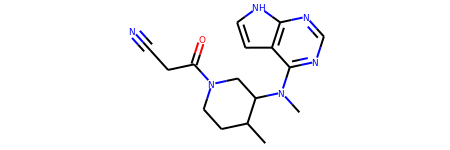

In [115]:
moleculaConvertida1 = Chem.MolFromSmiles('CC1CCN(CC1N(C)C2=NC=NC3=C2C=CN3)C(=O)CC#N')
moleculaConvertida1

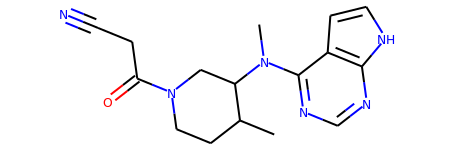

In [116]:
moleculaConvertida2 = Chem.MolFromSmiles('CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12')
moleculaConvertida2

In [117]:


mat2=smiles_encoder('CCC(C)(C)C(C)(C)CC')
mat2.shape

(120, 56)

In [118]:
print(mat2)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [119]:
dec2=smiles_decoder(mat2)
print(dec2)

CCC(C)(C)C(C)(C)CC                                                                                                      


In [129]:
lista_NOMBRES = ['1,1,2,2-TETRAPHENYLETHANE',
 'd-LIMONENE',
 'alpha-PHELLANDRENE',
 'beta-PHELLANDRENE',
 'alpha-TERPINENE',
 'perfluoro-2-propanone',
 'methyl m-toluate']

lista_SMILES = ['C1=CC=C(C=C1)C(C2=CC=CC=C2)C(C3=CC=CC=C3)C4=CC=CC=C4',
 'CC1=CCC(CC1)C(=C)C',
 'CC1=CCC(C=C1)C(C)C',
 'CC(C)C1CCC(=C)C=C1',
 'CC1=CC=C(CC1)C(C)C',
 'C(=O)(C(F)(F)F)C(F)(F)F',
 'CC1=CC=CC(=C1)C(=O)OC']
lista_SMILES

NOMBRES_SMILES = {NOMBRES : SMILES for NOMBRES, SMILES in zip(lista_NOMBRES, lista_SMILES)}
NOMBRES_SMILES

{'1,1,2,2-TETRAPHENYLETHANE': 'C1=CC=C(C=C1)C(C2=CC=CC=C2)C(C3=CC=CC=C3)C4=CC=CC=C4',
 'alpha-PHELLANDRENE': 'CC1=CCC(C=C1)C(C)C',
 'alpha-TERPINENE': 'CC1=CC=C(CC1)C(C)C',
 'beta-PHELLANDRENE': 'CC(C)C1CCC(=C)C=C1',
 'd-LIMONENE': 'CC1=CCC(CC1)C(=C)C',
 'methyl m-toluate': 'CC1=CC=CC(=C1)C(=O)OC',
 'perfluoro-2-propanone': 'C(=O)(C(F)(F)F)C(F)(F)F'}

In [130]:
smiles22 = NOMBRES_SMILES[str(sustancia_1.value)[2:-3]]
print(smiles22)

KeyError: ''

In [131]:
#from IPython.html import widgets
from ipywidgets import widgets
#from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook
from ipywidgets import *
import matplotlib.pyplot as plt
import ipywidgets as wdg
from IPython.display import clear_output


In [132]:
sustancia_1 = widgets.SelectMultiple(
    description="Sustancia",
    options=list(lista_sustancias))

In [133]:
sustancia_1

In [134]:
button = widgets.Button(description="Molecula")

def cargarDatos(b):
    clear_output()
    print("NOMBRE: {}".format(str(sustancia_1.value)[2:-3]))

    smiles = NOMBRES_SMILES[str(sustancia_1.value)[2:-3]]
    print("SMILE: {}".format(smiles))
    
    molecula_D = Chem.MolFromSmiles(smiles)
    Draw.MolToMPL(molecula_D, size=(80, 80))
    
    CONTRIBUCION_MOLECULA =pd.DataFrame(data=[grupoOrdenados, grupoContribucion], index=[smiles, str(sustancia_1.value)[2:-3]])
    print(CONTRIBUCION_MOLECULA)
    
    CTGF = np.sum(CONTRIBUCION_MOLECULA.iloc[0] * CONTRIBUCION_MOLECULA.iloc[1])
    print("Contribución grupal total = ", CTGF)
    Tb = temperatura_Ebullicion_funcional(CONSTANTES_PARAMETROS_EBULLICION, CTGF, numero_grupos)
    print("MCG:Metodo de Contribución de Grupos")
    print("Temperatura de ebullición MCG = {} K".format(Tb))
    
    return molecula_D
 
    #global Tcm, Pcm, wm

button.on_click(cargarDatos)
display(button)

In [135]:
tabs = widgets.Tab(children=[page1, page1, page1, page1, page1, page1])
#display(tabs)

tabs.set_title(0, 'Moleculas')
tabs.set_title(1, 'Modelos')
tabs.set_title(2, 'Parametros')
tabs.set_title(3, 'Resultados')
tabs.set_title(4, 'Experimentales')
tabs.set_title(5, 'Ajuste de Datos')

accord = widgets.Accordion(children=[tabs], width=400)
display(accord)

accord.set_title(0, 'Predicción de propiedades usando Grupos Funcionales')

In [136]:
page1 = widgets.VBox(children=[sustancia_1, button], padding=4)
page1


In [137]:
display(accord)

NOMBRE: 


KeyError: ''

In [144]:
mat=smiles_encoder('CC1CCN(CC1N(C)C2=NC=NC3=C2C=CN3)C(=O)CC#N')
mat.shape
print( mat )


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [145]:


dec=smiles_decoder(mat)
print(dec)

CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12                                                                                


In [146]:
dec

'CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12                                                                                '

In [ ]:
from ipywidgets import Button, HBox, VBox

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='center'
)


form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 1px',
    align_items='stretch',
    width='70%'
))
form

In [ ]:
from ipywidgets import Button, HBox, VBox

words = ['correct', 'horse', 'battery', 'staple']
items = [Button(description=w) for w in words]


#left_box = VBox([items[0], items[1]])
left_box = VBox([button,button])
left_box

#right_box = VBox([items[2], items[3]])
#HBox([left_box, right_box])

In [ ]:
HBox([button,button])

In [ ]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Moleculas'), 
        #sustancia_1], layout=form_item_layout),
         page1], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='SMILES'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

